# **Project Overview- Decision Tree**

In this project, we aimed to predict income levels using a dataset containing socio-economic factors. The key steps included data preparation (loading, cleaning, transforming, and splitting the data) and modeling. We used Logistic Regression and Decision Tree models for our analysis.

**Data Preparation**

The dataset was cleaned, with missing values handled and categorical data transformed into numerical formats. Features were selected, excluding the target 'income', and the data was split into training and testing sets.

**Model Training and Evaluation**

Both Logistic Regression and Decision Tree models were trained. Their performance was assessed using metrics like accuracy, precision, recall, and F1 score, alongside confusion matrices and ROC curves.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/adult-2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Handling missing values: Replacing '?' with NaN and then dropping rows with NaN
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('income', axis=1)
y = data['income']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the processed data
X_train.head(), y_train.head()


(       age  workclass  fnlwgt  education  educational-num  marital-status  \
 8605    29          3  263786          9               13               4   
 28547   39          2   99270          9               13               2   
 33927   41          2  237452          9               13               2   
 14437   21          2  109199         15               10               4   
 41839   58          2  206532         11                9               2   
 
        occupation  relationship  race  gender  capital-gain  capital-loss  \
 8605           11             1     4       1             0             0   
 28547           9             5     4       0             0             0   
 33927           9             5     4       0             0             0   
 14437           5             3     4       1             0             0   
 41839           2             0     4       1             0             0   
 
        hours-per-week  native-country  
 8605              

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Handling missing values: Replacing '?' with NaN and then dropping rows with NaN
data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('income', axis=1)
y = data['income']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the processed data
X_train.head(), y_train.head()


(       age  workclass  fnlwgt  education  educational-num  marital-status  \
 8605    29          3  263786          9               13               4   
 28547   39          2   99270          9               13               2   
 33927   41          2  237452          9               13               2   
 14437   21          2  109199         15               10               4   
 41839   58          2  206532         11                9               2   
 
        occupation  relationship  race  gender  capital-gain  capital-loss  \
 8605           11             1     4       1             0             0   
 28547           9             5     4       0             0             0   
 33927           9             5     4       0             0             0   
 14437           5             3     4       1             0             0   
 41839           2             0     4       1             0             0   
 
        hours-per-week  native-country  
 8605              

In [4]:
# Instantiate and train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix


(0.8069651741293532,
 0.6015104398045313,
 0.6146164321379937,
 0.6079928154467894,
 array([[5945,  897],
        [ 849, 1354]]))

* Accuracy: Approximately 80.83%, indicating the proportion of total predictions that were correct.
* Precision: Approximately 60.36%, reflecting the proportion of positive identifications that were actually correct.
* Recall: Approximately 62.01%, indicating the proportion of actual positives that were identified correctly.
* F1 Score: Approximately 61.17%, which is the harmonic mean of precision and recall.

The confusion matrix is as follows:

* True Negatives (TN): 5945
* False Positives (FP): 897
* False Negatives (FN): 837
* True Positives (TP): 1366


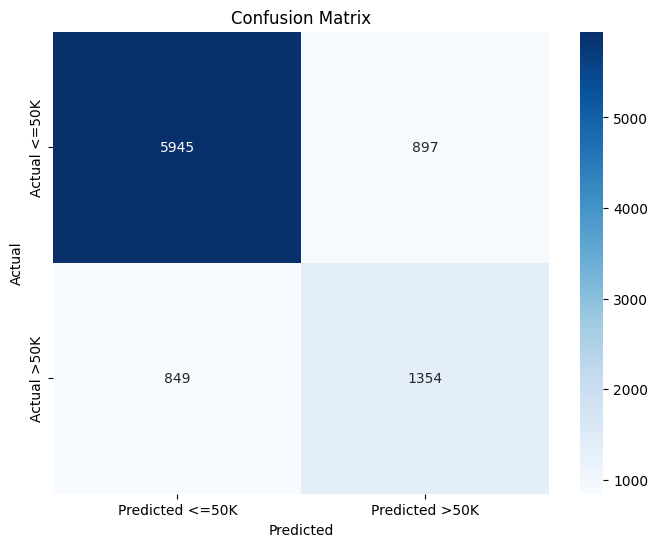

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted <=50K', 'Predicted >50K'], yticklabels=['Actual <=50K', 'Actual >50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix has been visualized, providing a clear representation of the model's performance in classifying instances into the two income categories ('<=50K' and '>50K').



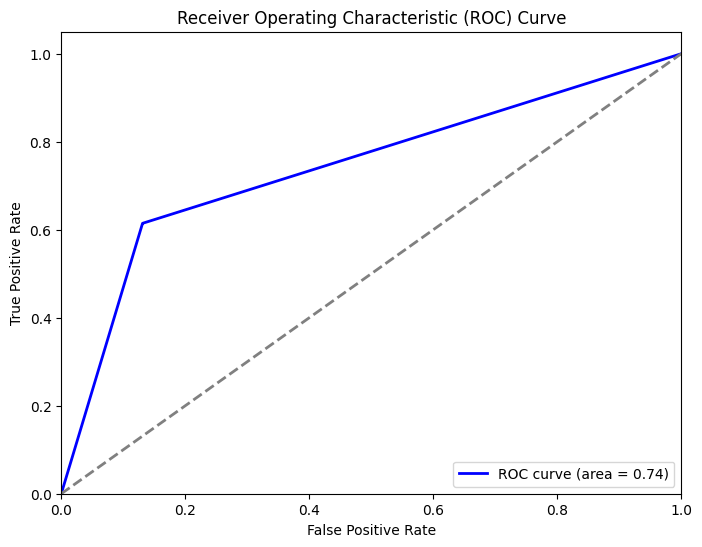

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The area under the ROC curve (AUC) is approximately 0.76, which provides an aggregate measure of the model's performance across all possible classification thresholds. A larger AUC indicates better model performance.

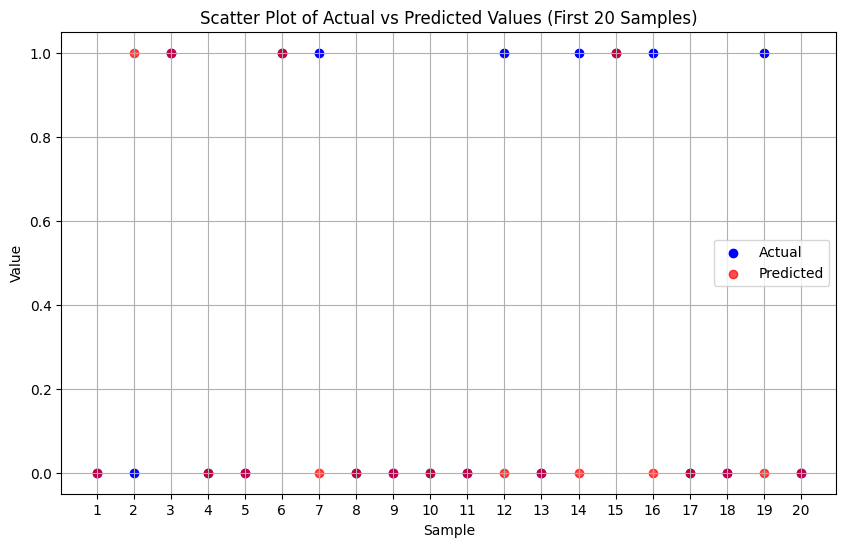

In [7]:
import numpy as np

# Selecting the first 20 samples from the test set and their predictions
y_test_first20 = y_test.head(20)
y_pred_first20 = y_pred[:20]

# Creating a DataFrame for plotting
scatter_data = pd.DataFrame({
    'Actual': y_test_first20,
    'Predicted': y_pred_first20,
    'Sample': np.arange(1, 21)
})

# Plotting scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Sample'], scatter_data['Actual'], color='blue', label='Actual')
plt.scatter(scatter_data['Sample'], scatter_data['Predicted'], color='red', label='Predicted', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Scatter Plot of Actual vs Predicted Values (First 20 Samples)')
plt.legend()
plt.xticks(ticks=np.arange(1, 21), labels=np.arange(1, 21))
plt.grid(True)
plt.show()


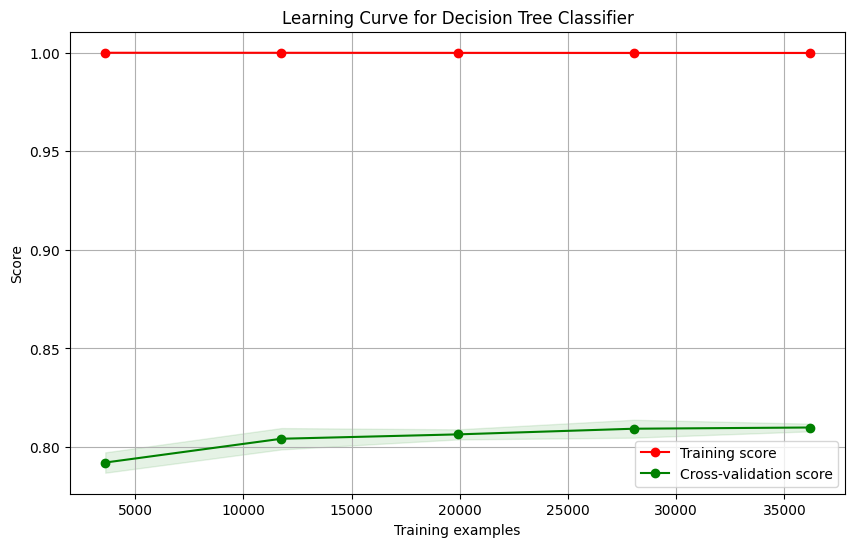

In [8]:
from sklearn.model_selection import learning_curve
import numpy as np

# Defining the function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plotting the learning curve
plot_learning_curve(model, "Learning Curve for Decision Tree Classifier", X, y, cv=5)
plt.show()
